<a href="https://colab.research.google.com/github/moajjem04/TrafficSignal/blob/main/TrafficSignal_LazyPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Google Drive

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


### Changing Directory to the Github Folder

In [2]:
%pwd

'/content'

In [3]:
%cd drive/MyDrive/TrafficSignal_1/TrafficSignal

/content/drive/MyDrive/TrafficSignal_1/TrafficSignal


In [4]:
%pwd

'/content/drive/MyDrive/TrafficSignal_1/TrafficSignal'

### Visualizing Images

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

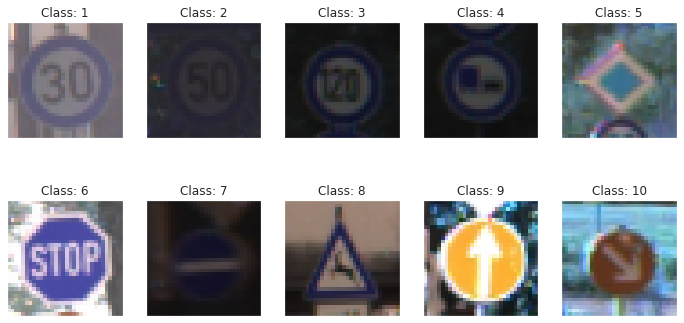

In [6]:
import cv2 as cv
from skimage import io
from skimage import color, feature, transform

fig, axs = plt.subplots(2, 5, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
for i, ax in enumerate(axs.ravel()):
  sFolder = "{0:0=5d}".format(i+1) # Format nNumFolder to folder names
  path = 'training/' + sFolder + '/00000_00009.ppm'
  Img= cv.imread(path)
  Img = transform.resize(Img,(32,32))
  ax.imshow(Img)
  ax.set_title('Class: ' + str(i+1))





### Deciding the Cell Size for feature extraction

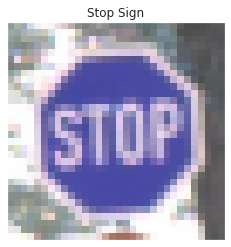

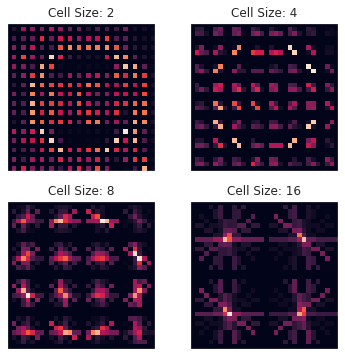

In [7]:

image = cv.imread('training/00006/00000_00009.ppm')
image = transform.resize(image,(32,32))
plt.axes(xticks=[],yticks =[])
plt.title('Stop Sign')
plt.imshow(image);
fig, axs = plt.subplots(2, 2, figsize=(6, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
cell_size = (2,4,8,16)

for i, ax in enumerate(axs.ravel()):
  hog_vec, hog_vis = feature.hog(image,pixels_per_cell=(cell_size[i], cell_size[i]),
                                           cells_per_block=(3, 3),visualize = True)
  ax.imshow(hog_vis)
  ax.set_title('Cell Size: ' + str(cell_size[i]))  


# Feature Extraction from Training Images

In [16]:
from tqdm.notebook import tqdm

In [17]:
import glob
count =0;
train_image_num = 400;
train_class =10;
trainingFeatures = np.zeros(shape=(train_image_num*train_class,324))
trainingLabels = np.zeros(shape=(train_image_num*train_class,1))
number_list = list(range(1,11))
for nNumFolder in tqdm(number_list):
  #print(nNumFolder)
  sFolder = "{0:0=5d}".format(nNumFolder) # Format nNumFolder to folder names
  #print(sFolder)
  path = 'training/' + sFolder + '/*.ppm' 
  for file in glob.glob(path):
   #print(file)
   Img= cv.imread(file)
   Img = transform.resize(Img,(32,32))
   trainingFeatures[count,:] = feature.hog(Img,pixels_per_cell=(8, 8),
                                           cells_per_block=(3, 3))
   trainingLabels[count,:] = nNumFolder
   count = count+1;

print(trainingLabels.shape)
print(trainingFeatures.shape)



(4000, 1)
(4000, 324)


# Feature Extraction from Testing Images

In [19]:
count =0;
test_image_num = 100;
test_class =10;
testingFeatures = np.zeros(shape=(test_image_num*test_class,324))
testingLabels = np.zeros(shape=(test_image_num*test_class,1))
number_list = list(range(1,11))
for nNumFolder in tqdm(number_list):
  #print(nNumFolder)
  sFolder = "{0:0=5d}".format(nNumFolder) # Format nNumFolder to folder names
  #print(sFolder)
  path = 'testing/' + sFolder + '/*.ppm' 
  for file in glob.glob(path):
   #print(file)
   Img= cv.imread(file)
   Img = transform.resize(Img,(32,32))
   testingFeatures[count,:] = feature.hog(Img,pixels_per_cell=(8, 8),
                                           cells_per_block=(3, 3))
   testingLabels[count,:] = nNumFolder
   count = count+1;

print(testingLabels.shape)
print(testingFeatures.shape)



(1000, 1)
(1000, 324)


# Using Lazy Predict to find the best models

In [10]:
!pip install lazypredict

In [11]:
import lazypredict

In [12]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(trainingFeatures, testingFeatures, trainingLabels.ravel(), testingLabels.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 30/30 [03:46<00:00,  7.54s/it]


In [13]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.89,0.89,None,0.89,4.63
SGDClassifier,0.89,0.89,None,0.89,1.21
ExtraTreesClassifier,0.88,0.88,None,0.88,1.27
CalibratedClassifierCV,0.88,0.88,None,0.88,11.15
LogisticRegression,0.88,0.88,None,0.87,1.53
LinearDiscriminantAnalysis,0.88,0.88,None,0.88,0.46
RidgeClassifierCV,0.87,0.87,None,0.87,0.40
LGBMClassifier,0.87,0.87,None,0.87,79.11
RandomForestClassifier,0.87,0.87,None,0.87,5.91


In [14]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.89,0.89,None,0.89,4.63
SGDClassifier,0.89,0.89,None,0.89,1.21
ExtraTreesClassifier,0.88,0.88,None,0.88,1.27
CalibratedClassifierCV,0.88,0.88,None,0.88,11.15
LogisticRegression,0.88,0.88,None,0.87,1.53
LinearDiscriminantAnalysis,0.88,0.88,None,0.88,0.46
RidgeClassifierCV,0.87,0.87,None,0.87,0.40
LGBMClassifier,0.87,0.87,None,0.87,79.11
RandomForestClassifier,0.87,0.87,None,0.87,5.91
